# Splitting dataset to train and validation files

In [4]:
import numpy as np
import pandas as pd
import re as re
#import sys
#sys.path.insert(0,'..')

TRAIN_CSV = r'data\titanic\train.csv'
df = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Age': np.float64})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
n = df.shape[0]
n_val = int(n * 0.2)
n_train = n - n_val

# Shuffle indeces
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]

In [7]:
from settings.constants import TRAIN_CSV, VAL_CSV 
df_train.to_csv(TRAIN_CSV, index=False)
df_val.to_csv(VAL_CSV, index=False)

# Import datasets

In [22]:
import numpy as np
import pandas as pd
import re as re

from settings.constants import TRAIN_CSV, VAL_CSV 

train = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Age': np.float64})
val  = pd.read_csv(VAL_CSV , header = 0, dtype={'Age': np.float64})
full_data = [train, val]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [2]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.647059
1,2,0.466667
2,3,0.246819


In [3]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.739130
1,male,0.195652


In [4]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,1,0.303318
1,2,0.574803
2,3,0.577778
3,4,0.666667
4,5,0.200000
5,6,0.157895
6,7,0.400000
7,8,0.000000
8,11,0.000000


In [5]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.512027
1,1,0.303318


In [6]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.561151
1,Q,0.338710
2,S,0.347656


In [7]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.925]",0.204301
1,"(7.925, 14.5]",0.304598
2,"(14.5, 31.0]",0.462857
3,"(31.0, 512.329]",0.589888


In [8]:
age_avg = train['Age'].mean()
age_std = train['Age'].std()    
age_null_count = train['Age'].isnull().sum()
    
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

C:\Users\kam\AppData\Local\Temp/ipykernel_8040/3043699498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])] = age_null_random_list


,CategoricalAge,Survived
0,"(-0.08, 16.0]",0.536842
1,"(16.0, 32.0]",0.351955
2,"(32.0, 48.0]",0.384211
3,"(48.0, 64.0]",0.440678
4,"(64.0, 80.0]",0.090909


In [9]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

train['Title'] = train['Name'].apply(get_title)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,1
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Major,0,2
Master,0,35
Miss,142,0


In [10]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.571429
1,Miss,0.703448
2,Mr,0.162562
3,Mrs,0.783019
4,Rare,0.285714


# Data preprocessing

In [11]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Fare'] = pd.qcut(train['Fare'], 4)

age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
rng = np.random.RandomState(42)
age_null_random_list = rng.uniform(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list

train['Age'] = pd.cut(train['Age'], 5)
train['Title'] = train['Name'].apply(get_title)
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
                                        'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].fillna(0)

C:\Users\kam\AppData\Local\Temp/ipykernel_8040/3366582589.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])] = age_null_random_list


In [12]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 
                 'SibSp', 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder

# encode labels
le = LabelEncoder()

le.fit(train['Sex'])
train['Sex'] = le.transform(train['Sex'])

le.fit(train['Title'])
train['Title'] = le.transform(train['Title'])

le.fit(train['Embarked'].values)
train['Embarked'] = le.transform(train['Embarked'].values)

le.fit(train['Fare'])
train['Fare'] = le.transform(train['Fare'])

le.fit(train['Age'])
train['Age'] = le.transform(train['Age'])

In [23]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import LabelEncoder


class DataLoader(object):
    def fit(self, dataset):
        self.dataset = dataset.copy()

    # apply regex
    def get_title(self, name):
        pattern = ' ([A-Za-z]+)\.'
        title_search = re.search(pattern, name)
        # If the title exists, extract and return it.
        if title_search:
            return title_search.group(1)
        return ""

    def load_data(self):
        # columns combination
        self.dataset['FamilySize'] = self.dataset['SibSp'] + self.dataset['Parch'] + 1

        # replace value
        self.dataset['IsAlone'] = 0
        self.dataset.loc[self.dataset['FamilySize'] == 1, 'IsAlone'] = 1

        # fill Nan with mode
        self.dataset['Embarked'] = self.dataset['Embarked'].fillna(self.dataset['Embarked'].mode()[0])

        # fill Nan with median
        self.dataset['Fare'] = self.dataset['Fare'].fillna(self.dataset['Fare'].median())
        # binning with qcut
        self.dataset['Fare'] = pd.qcut(self.dataset['Fare'], 4)

        # fill Nan with values from random distribution
        age_avg = self.dataset['Age'].mean()
        age_std = self.dataset['Age'].std()
        age_null_count = self.dataset['Age'].isnull().sum()
        rng = np.random.RandomState(42)
        age_null_random_list = rng.uniform(age_avg - age_std, age_avg + age_std, size=age_null_count)
        self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list

        # binning with cut
        self.dataset['Age'] = pd.cut(self.dataset['Age'], 5)

        # apply regex
        self.dataset['Title'] = self.dataset['Name'].apply(self.get_title)
        # replace
        self.dataset['Title'] = self.dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                                               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
                                                               'Rare')
        # replace
        self.dataset['Title'] = self.dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
        # replace
        self.dataset['Title'] = self.dataset['Title'].replace('Mme', 'Mrs')
        # fill nans
        self.dataset['Title'] = self.dataset['Title'].fillna(0)

        # drop columns
        drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',
                         'Parch', 'FamilySize']

        self.dataset = self.dataset.drop(drop_elements, axis=1)

        # encode labels
        le = LabelEncoder()

        le.fit(self.dataset['Sex'])
        self.dataset['Sex'] = le.transform(self.dataset['Sex'])
        
        le.fit(self.dataset['Title'])
        self.dataset['Title'] = le.transform(self.dataset['Title'])

        le.fit(self.dataset['Embarked'].values)
        self.dataset['Embarked'] = le.transform(self.dataset['Embarked'].values)

        le.fit(self.dataset['Fare'])
        self.dataset['Fare'] = le.transform(self.dataset['Fare'])

        le.fit(self.dataset['Age'])
        self.dataset['Age'] = le.transform(self.dataset['Age'])

        return self.dataset


In [24]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.00,0,0,C.A. 18723,10.5000,NaN,S
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.00,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.00,0,1,248727,33.0000,NaN,S
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
708,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
709,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
710,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,NaN,S
711,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [25]:
dl = DataLoader()
dl.fit(train)
df = dl.load_data()

C:\Users\kam\AppData\Local\Temp/ipykernel_8040/1543072653.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list


In [26]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,1,3,1,1,2,0,0,0
1,0,2,1,1,1,2,1,2
2,0,3,1,1,0,2,1,2
3,1,2,0,0,3,2,0,1
4,1,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
708,0,3,1,1,2,2,0,2
709,0,3,1,1,0,2,1,2
710,0,3,1,0,3,2,0,0
711,1,3,1,0,1,0,0,0


In [27]:
from utils.dataloader import DataLoader

X_raw = train.drop("Survived", axis=1)

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = train["Survived"]

C:\Users\kam\Documents\app2\utils\dataloader.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list


In [28]:
X

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,3,1,1,2,0,0,0
1,2,1,1,1,2,1,2
2,3,1,1,0,2,1,2
3,2,0,0,3,2,0,1
4,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...
708,3,1,1,2,2,0,2
709,3,1,1,0,2,1,2
710,3,1,0,3,2,0,0
711,3,1,0,1,0,0,0


# Models

C:\Users\kam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\kam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\kam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\kam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\kam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighb

,Classifier,Accuracy
0,KNeighborsClassifier,0.751389
0,SVC,0.809722
0,DecisionTreeClassifier,0.781944
0,RandomForestClassifier,0.777778
0,AdaBoostClassifier,0.788889
0,GradientBoostingClassifier,0.808333
0,GaussianNB,0.729167
0,LinearDiscriminantAnalysis,0.777778
0,QuadraticDiscriminantAnalysis,0.784722
0,LogisticRegression,0.773611


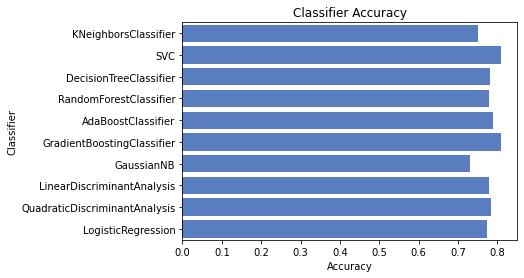

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "b")
log

In [6]:
import pickle
import json
import pandas as pd
from sklearn.svm import SVC

from utils.dataloader import DataLoader 
from settings.constants import TRAIN_CSV


with open('settings/specifications.json') as f:
    specifications = json.load(f)

raw_train = pd.read_csv(TRAIN_CSV)
x_columns = specifications['description']['X']
y_column = specifications['description']['y']

X_raw = raw_train[x_columns]

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = raw_train.Survived

model = SVC()
model.fit(X, y)
with open('models/SVC.pickle', 'wb')as f:
    pickle.dump(model, f)

C:\Users\kam\Documents\app2\utils\dataloader.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list


In [7]:
import pickle
import json
import pandas as pd
from sklearn.svm import SVC

from utils.dataloader import DataLoader 
from settings. constants import VAL_CSV


with open('settings/specifications.json') as f:
    specifications = json.load(f)

x_columns = specifications['description']['X']
y_column = specifications['description']['y']

raw_val = pd.read_csv(VAL_CSV)
x_raw = raw_val[x_columns]

loader = DataLoader()
loader.fit(x_raw)
X = loader.load_data()
y = raw_val.Survived

loaded_model = pickle.load(open('models/SVC.pickle', 'rb'))
loaded_model.score(X, y)


C:\Users\kam\Documents\app2\utils\dataloader.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list


0.8370786516853933

# Prediction

In [4]:
import json
import requests
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from utils import *
from settings. constants import TRAIN_CSV, VAL_CSV

with open('settings/specifications.json') as f:
    specifications = json.load(f)
    
info = specifications['description']
x_columns, y_column, metrics = info['X'], info['y'], info['metrics']

train_set = pd.read_csv(TRAIN_CSV, header=0)
val_set = pd.read_csv(VAL_CSV, header=0)

train_x, train_y = train_set[x_columns], train_set[y_column]
val_x, val_y = val_set[x_columns], val_set[y_column]

loader = DataLoader()
loader.fit(val_x)
val_processed = loader.load_data()
print('data: ', val_processed[:10])

req_data = {'data': json.dumps(val_x.to_dict())}
response = requests.get('http://192.168.65.3:8000/predict', data=req_data)

C:\Users\kam\Documents\app2\utils\dataloader.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list


data:     Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0       3    1    3     0         2        1      2
1       1    1    3     3         0        0      2
2       2    0    3     3         2        0      3
3       1    0    3     3         0        0      4
4       3    1    0     3         2        0      0
5       1    0    3     3         2        0      3
6       3    0    2     2         2        0      3
7       2    1    2     1         2        1      2
8       1    1    3     3         0        0      2
9       3    1    2     3         2        0      0


ConnectionError: HTTPConnectionPool(host='192.168.65.3', port=8000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000021EBA71CD60>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
response

In [ ]:
api_predict = response.json()['prediction']
print('predict: ', api_predict[:10])

api_score = eval(metrics)(val_y, api_predict)
print('accuracy: ', api_score)